<a href="https://colab.research.google.com/github/cedillo2010/RobotTrading/blob/main/RobotTrading_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Challenge Robot Trading*** 

# 1.- Configuracion del ambiente 

In [2]:
import urllib.request as urllib_request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4 
from urllib.request import urlopen
from IPython.display import clear_output
import time

print("BeautifulSoup ->", bs4.__version__)
print("urllib ->", urllib_request.__version__)
print("pandas ->" , pd.__version__)
print("numpy ->", np.version.version)



BeautifulSoup -> 4.11.2
urllib -> 3.10
pandas -> 1.5.3
numpy -> 1.22.4


In [ ]:
#definicion de variables 
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

# 2.Obtención de datos 

Funcion importar_base_bitcoin()

Crea una funcion importar_base_bitcoin():
Utiliza la biblioteca yfinance de Python para extraer el 
histórico de precios del Bitcoin en dólares BTC-USD, 
deberás extraer el histórico de los últimos 7
días en intervalos de 5 minutos, 

este histórico deberás guardarlo en el dataframe df_bitcoin.

In [4]:
##importar bibliotecas 
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup 
import pandas as pd 
import yfinance as yf
from bs4 import BeautifulSoup 

def importar_base_bitcoin():
  #definicion de variables 
  global df_bitcoin
  ticker =yf.Ticker('BTC-USD')
  info = ticker.history(period="7d", interval="5m")

  df_bitcoin = pd.DataFrame (info)
  return df_bitcoin
   

Funcion extraer_tendencias()

Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual. 
 Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.

In [5]:
def extraer_tendencias():
  ##importar bibliotecas 
  from urllib.request import urlopen, urlretrieve, Request
  import requests
  from bs4 import BeautifulSoup 
  import pandas as pd 
  import time ##para dar una pequeña pausa entre las iteracciones por pagina 
  
  url = "https://coinmarketcap.com/"
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  soup


  #obteniendo el precio actual 
  precio_actual= soup.findAll('div', class_ =['sc-cadad039-0 clgqXO fall','sc-cadad039-0 clgqXO rise','sc-cadad039-0 clgqXO'])
  precio_actual =precio_actual[0].get_text()
  precio_actual= (precio_actual.replace(',',''))
  precio_actual= float(precio_actual.replace('$',''))
  
  
  #Verificar la tendencia
  tendencias = soup.findAll('span', {'class':['sc-97d6d2ca-0 cYiHal','sc-97d6d2ca-0 bQjSqS']}) 
  
  # Verificamos si es a la alza
  if "icon-Caret-up" in str(tendencias[0]):
      tendencia = 'Alta'
  else:
      tendencia = 'Baja'
  
  return [precio_actual, tendencia]



# 3. Limpieza de datos
Crea una funcion limpieza_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Antes de limpiar la base, crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva base(df_bitcoin_limpio), sin modificar la base original, además es importante entender su contenido:

Para la limpieza utilizaremos los atributos Datetime, Close y Volume.

Analiza la base df_bitcoin_limpio, identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.
Luego busca por valores nulos en la columna Close y trátalos.
Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.
Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.
Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.
Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.

Buscar valores nulos en la columna close 

In [ ]:
df_bitcoin = importar_base_bitcoin()
len(df_bitcoin)

1726

In [ ]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2023-05-14 00:00:00+00:00 to 2023-05-20 01:55:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1726 non-null   float64
 1   High          1726 non-null   float64
 2   Low           1726 non-null   float64
 3   Close         1726 non-null   float64
 4   Volume        1726 non-null   int64  
 5   Dividends     1726 non-null   float64
 6   Stock Splits  1726 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 107.9 KB


a pesar de que en los registros no se encontraron nulos, se utilizara el metodo dropna() para eliminarlos en caso de que en otra corrida los hubiere.

In [ ]:
df_bitcoin.dropna(subset = ['Close'], inplace = True )

In [ ]:
len(df_bitcoin)

1726

In [ ]:
seleccion= (df_bitcoin['Volume']> 0)

In [ ]:
len(df_bitcoin[seleccion])

925

In [ ]:
df_bitcoin_limpio = df_bitcoin[seleccion]

In [ ]:
len (df_bitcoin_limpio)

925

In [ ]:
#verificar si tiene valores con cero en Close 
seleccion = (df_bitcoin_limpio['Close']==0)
len(df_bitcoin_limpio[seleccion])

0

In [ ]:
df_bitcoin_limpio['Close']==0

Datetime
2023-05-14 00:05:00+00:00    False
2023-05-14 00:10:00+00:00    False
2023-05-14 00:15:00+00:00    False
2023-05-14 00:25:00+00:00    False
2023-05-14 00:30:00+00:00    False
                             ...  
2023-05-20 01:15:00+00:00    False
2023-05-20 01:25:00+00:00    False
2023-05-20 01:30:00+00:00    False
2023-05-20 01:40:00+00:00    False
2023-05-20 01:50:00+00:00    False
Name: Close, Length: 925, dtype: bool

A pesar de que los registros, no tienen cero, en esta corrida, se considerara colocarle el valor promedio de close si estos llegaran a ser 0 

In [ ]:
 media_bitcoin = df_bitcoin_limpio['Close'].mean()
df_bitcoin_limpio['Close'].replace(0,media_bitcoin)

Datetime
2023-05-14 00:05:00+00:00    26768.802734
2023-05-14 00:10:00+00:00    26776.935547
2023-05-14 00:15:00+00:00    26769.892578
2023-05-14 00:25:00+00:00    26803.947266
2023-05-14 00:30:00+00:00    26817.855469
                                 ...     
2023-05-20 01:15:00+00:00    26871.482422
2023-05-20 01:25:00+00:00    26889.425781
2023-05-20 01:30:00+00:00    26878.082031
2023-05-20 01:40:00+00:00    26870.388672
2023-05-20 01:50:00+00:00    26861.800781
Name: Close, Length: 925, dtype: float64

In [6]:
def limpieza_datos():
  df_bitcoin =  importar_base_bitcoin()
  #Copiar el dataframe 
  df_bitcoin_limpio = df_bitcoin.copy() 
  df_bitcoin_limpio
 
  #Eliminando duplicados por el indice
  df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]

  #Elimando valores nulos de la columna Close
  df_bitcoin_limpio.dropna(subset = ['Close'], inplace = True )

  #Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0,
  # caso contrário, elimínalos
  seleccion = (df_bitcoin_limpio['Volume'] > 0)
  df_bitcoin_limpio= df_bitcoin_limpio[seleccion]

  # Calcular el valor promedio del campo "Puntaje"
  media_bitcoin = df_bitcoin_limpio['Close'].mean()

  #Reemplazar los valores de  0 por el promedio 
  df_bitcoin_limpio['Close'].replace(0,media_bitcoin)

  
  #Identificar y eliminar los outliers en el precio del Bitcoin, columna Close,
  # utiliza un gráfico de boxplot para identificarlos.
  #quitar outliers
  close= df_bitcoin_limpio['Close']
  Q1= close.quantile(.25)
  Q3= close.quantile(.75)
  IIQ= Q3-Q1
  limite_inferior= Q1 - 1.5 * IIQ 
  limite_superior= Q3 + 1.5 * IIQ 
  seleccion = ((close >= limite_inferior) & (close <= limite_superior))
  df_bitcoin_limpio = df_bitcoin_limpio[seleccion]

  # Calcular el valor promedio del campo "Puntaje"
  media_bitcoin = df_bitcoin_limpio['Close'].mean()
  return [df_bitcoin_limpio, media_bitcoin]




<Axes: >

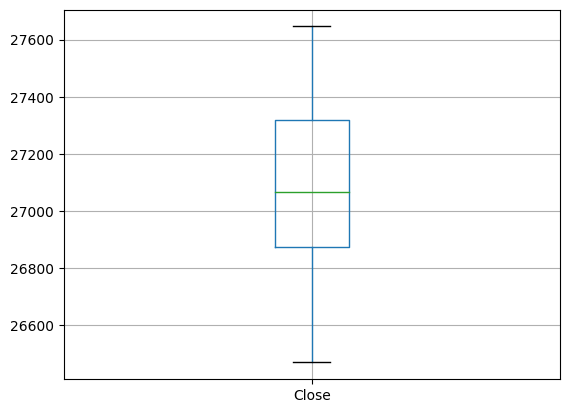

In [ ]:
#para visualizar outlyers
df_bitcoin_limpio, media_bitcoin = limpieza_datos()
df_bitcoin_limpio.boxplot(['Close'])

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

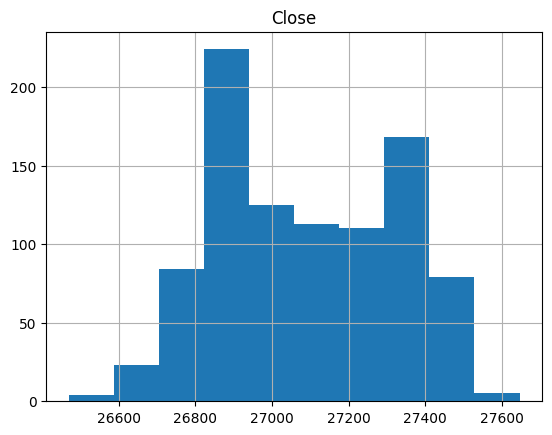

In [ ]:
df_bitcoin_limpio.hist(['Close'])

# 4. Tomar decisiones
Llegó el momento de construir tu algoritmo de decisión:

Crea una funcion tomar_decisiones(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.
Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.
Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor ''.

In [7]:
def tomar_decisiones():
  global precio_actual, tendencia, media_bitcoin, algoritmo_decision
  precio_actual, tendencia = extraer_tendencias()
  df_bitcoin_limpio, media_bitcoin = limpieza_datos()
  if (precio_actual >= media_bitcoin and tendencia == "Baja"):
      algoritmo_decision= "Es un buen momento para vender "
  elif (precio_actual < media_bitcoin and tendencia == "Alta"):
      algoritmo_decision ="Es un buen momento para comprar"
  return algoritmo_decision

# Visualización

Crea una funcion visualizacion(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Adiciona una nueva columna (Promedio) al dataframe original df_bitcoiny almacena el valor de nuestra variable media_bitcoin.
Configura el tamaño del gráfico en una proporción de 16x5.
Adiciona un título al gráfico.
Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin.
Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin.
Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.
Finalmente, usando el método show()muestra en pantalla el gráfico que acabamos de configurar.

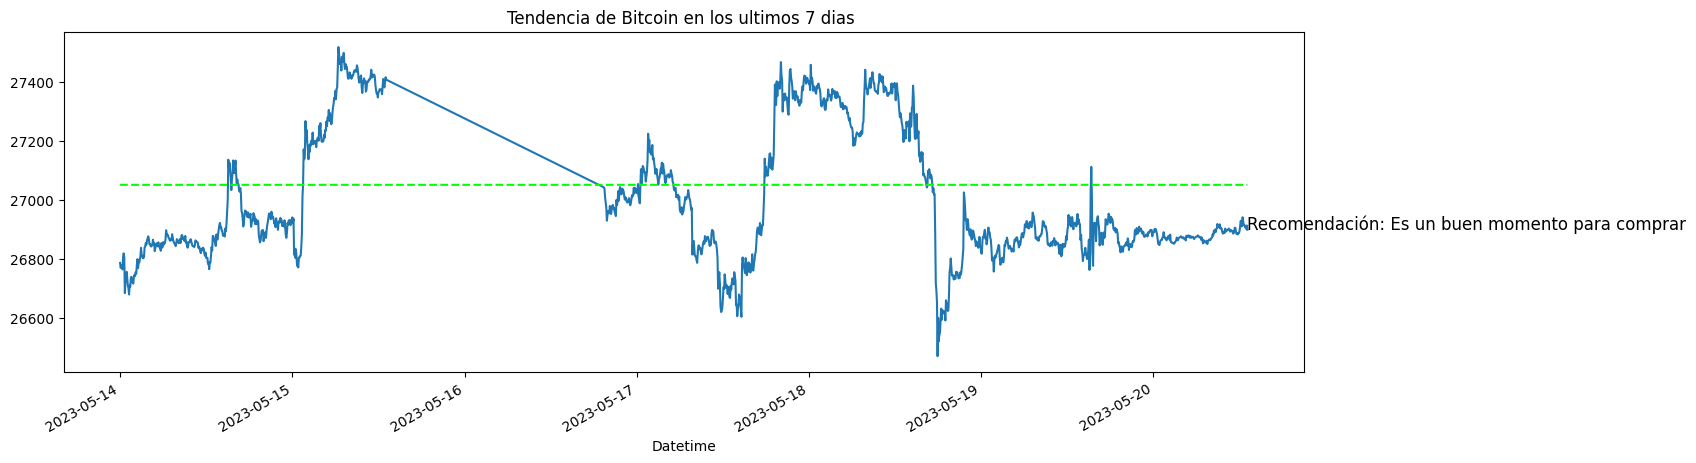

In [8]:
def visualizacion():
  #definicion de variables 
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
  
  df_bitcoin = importar_base_bitcoin()
  df_bitcoin_limpio, media_bitcoin = limpieza_datos()

  #crear una nueva columna para almacenar el promedio 
  df_bitcoin['Promedio'] = media_bitcoin

  plt.figure(figsize=(16,5))
 
  plt.title('Tendencia de Bitcoin en los ultimos 7 dias ') 
  #Usando el método plot()dibuja una línea en el gráfico, 
  #con los datos del índice y la columna Close de la base df_bitcoin
  plt.plot(df_bitcoin.index,df_bitcoin['Close'])
  df_bitcoin['Promedio'].plot(legend = None, ls='--', color = '#00ff00')
  algoritmo_decision = tomar_decisiones()
  #Muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.
  #Mostramos un mensaje con la decisión tomada
  plt.annotate(f'Recomendación: {algoritmo_decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), fontsize = 12)
  plt.show()


# Automatización

El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

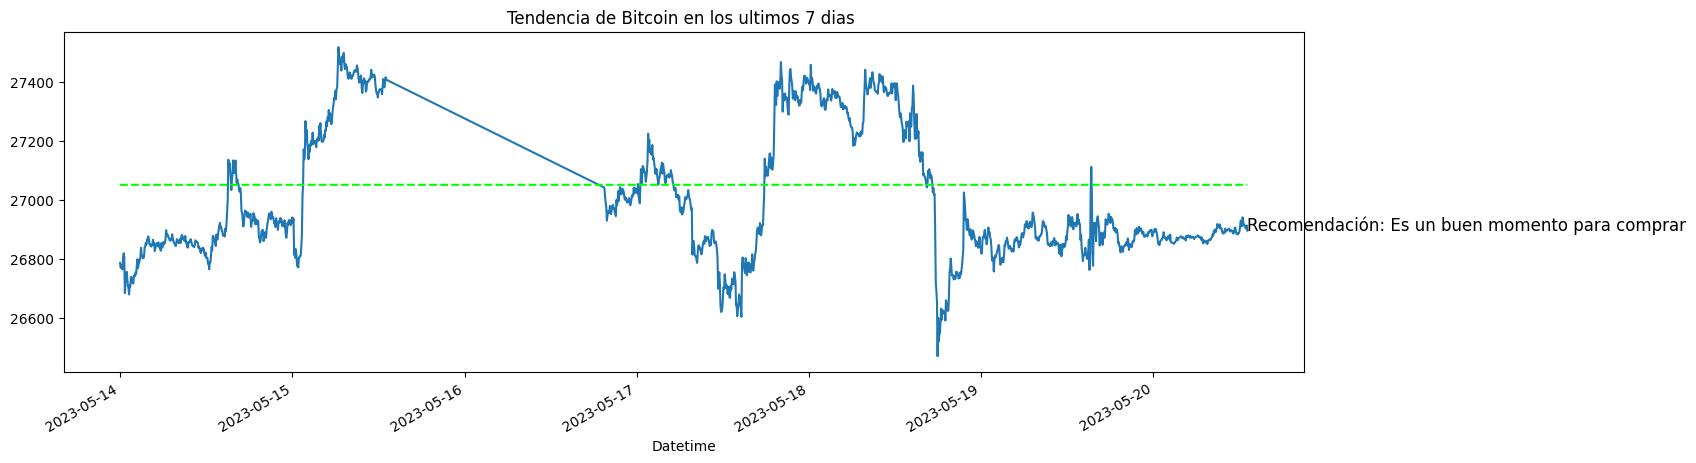

KeyboardInterrupt: ignored

In [9]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)